In [3]:
import akshare as ak
# 读入中国平安 「000001」 2022-06-01 到 2022-12-01 日收盘价数据
df = ak.stock_zh_a_hist(symbol="600519", period="daily", start_date="20230301", end_date='20240301', adjust="")
print(df.head())

           日期       开盘       收盘       最高       最低    成交量           成交额    振幅  \
0  2023-03-01  1813.00  1838.53  1848.00  1803.23  24458  4.475592e+09  2.47   
1  2023-03-02  1829.00  1828.00  1838.99  1821.10  13144  2.405292e+09  0.97   
2  2023-03-03  1839.77  1818.04  1841.61  1802.48  16198  2.946843e+09  2.14   
3  2023-03-06  1818.18  1807.14  1818.50  1796.77  20646  3.730080e+09  1.20   
4  2023-03-07  1805.98  1788.30  1816.60  1788.00  22785  4.101302e+09  1.58   

    涨跌幅    涨跌额   换手率  
0  1.37  24.79  0.19  
1 -0.57 -10.53  0.10  
2 -0.54  -9.96  0.13  
3 -0.60 -10.90  0.16  
4 -1.04 -18.84  0.18  


In [4]:
import talib
ma = talib.MA(df['收盘'],timeperiod=5)
print(ma.head())

0         NaN
1         NaN
2         NaN
3         NaN
4    1816.002
dtype: float64


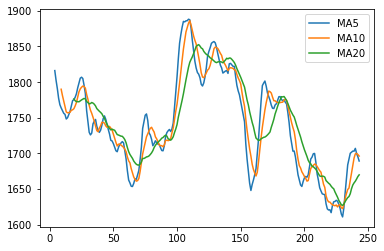

In [5]:
import talib
import matplotlib.pyplot as plt
# 计算MA指标
ma5 = talib.MA(df['收盘'],timeperiod=5)
ma10 = talib.MA(df['收盘'],timeperiod=10)
ma20 = talib.MA(df['收盘'],timeperiod=20)
# 可视化
fig = plt.figure()
ax = fig.add_subplot(111)
# 绘制MA指标
ax.plot(ma5,label='MA5')
ax.plot(ma10,label='MA10')
ax.plot(ma20,label='MA20')
plt.legend()  # 显示图例
plt.show()

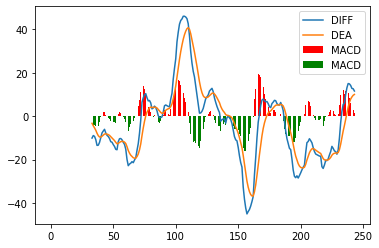

In [6]:
import talib
import matplotlib.pyplot as plt
import numpy as np

# 计算MACD指标
diff,dea,macd = talib.MACD(df['收盘'],fastperiod=12, slowperiod=26, signalperiod=9)
# 可视化
fig = plt.figure()
ax = fig.add_subplot(111)
# 绘制DIFF和DEA曲线
ax.plot(diff,label='DIFF')
ax.plot(dea,label='DEA')
# 分别得到MACD的Bar是正值和负值的数据
pos_macd = np.where(macd>0,macd,0)
neg_macd = np.where(macd<0,macd,0)
# 绘制MACD柱状图
ax.bar(range(len(macd)),pos_macd,width=0.6,facecolor='red',label='MACD')
ax.bar(range(len(macd)),neg_macd,width=0.6,facecolor='green',label='MACD')
plt.legend()  # 显示图例
plt.show()

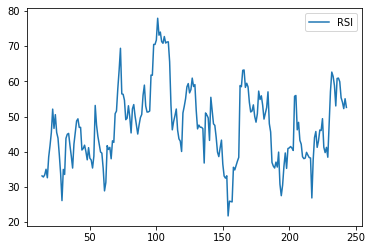

In [7]:
import talib
import matplotlib.pyplot as plt
# 计算RSI指标
rsi = talib.RSI(df['收盘'],timeperiod=14)
# 可视化
fig = plt.figure()
ax = fig.add_subplot(111)
# 绘制RSI指标
ax.plot(rsi,label='RSI')
plt.legend()  # 显示图例
plt.show()

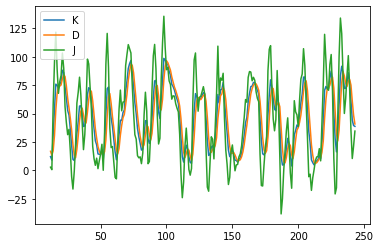

In [8]:
import talib
import matplotlib.pyplot as plt
# 计算KDJ指标
K,D = talib.STOCH(df['最高'],df['最低'],df['收盘'],fastk_period=9, slowk_period=3, slowd_period=3)
J = 3*K - 2*D
# 可视化
fig = plt.figure()
ax = fig.add_subplot(111)
# 绘制KDJ指标
ax.plot(K,label='K')
ax.plot(D,label='D')
ax.plot(J,label='J')

plt.legend()  # 显示图例
plt.show()